<a href="https://colab.research.google.com/github/vanshu1722/ADS-experiment/blob/main/ADS_Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data ==> https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
data=pd.read_csv("/content/data.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#dimensions
data.shape

(13611, 17)

In [ ]:
#count no of classes
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

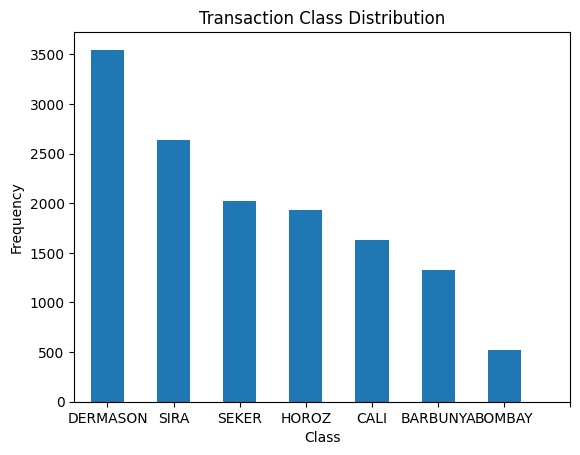

In [ ]:
#plot the different class counts
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(8))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
#separate different classes
dermason=data[data['Class']=="DERMASON"]
sira=data[data['Class']=="SIRA"]
seker=data[data['Class']=="SEKER"]
horoz=data[data['Class']=="HOROZ"]
cali=data[data['Class']=="CALI"]
barbunya=data[data['Class']=="BARBUNYA"]
bombay=data[data['Class']=="BOMBAY"]

In [ ]:
#features and target
features=data.drop(['Class'],axis='columns')
target=data["Class"]

In [ ]:
#use SMOTE to balance
from imblearn.combine import SMOTETomek
smtk=SMOTETomek()
x_res,y_res=smtk.fit_resample(features,target)
x_res.shape

(23854, 16)

Text(0, 0.5, 'Frequency')

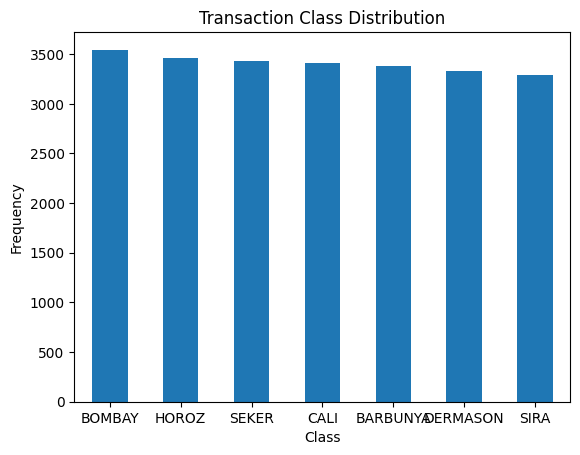

In [ ]:
#now plot again
count_classes=pd.value_counts(y_res,sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
# plt.xticks(range(5))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
count_classes=pd.value_counts(y_res,sort=True)
count_classes

BOMBAY      3545
HOROZ       3457
SEKER       3432
CALI        3414
BARBUNYA    3384
DERMASON    3331
SIRA        3291
Name: Class, dtype: int64

In [ ]:
# save the resampled data
x_res.to_csv("x_resampled.csv")
y_res.to_csv("y_resampled.csv")

In [ ]:
x_res

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018000,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110000,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884000,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134000,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23849,52378,884.825668,341.815010,196.971236,1.736987,0.816210,53202,258.245173,0.732186,0.984519,0.840829,0.755900,0.006526,0.001316,0.571687,0.991022
23850,37354,723.106642,268.478412,177.476893,1.512754,0.750341,37766,218.085717,0.776536,0.989099,0.897738,0.812303,0.007187,0.001930,0.659837,0.998168
23851,43460,785.529371,286.852922,194.436526,1.477198,0.732740,44084,235.235648,0.730033,0.985841,0.885404,0.820621,0.006600,0.001849,0.673889,0.992787
23852,56255,900.664393,348.661387,206.206966,1.690861,0.806338,56821,267.631472,0.707524,0.990036,0.871478,0.767605,0.006198,0.001327,0.589224,0.996257


In [ ]:
y_res

0        SEKER
1        SEKER
2        SEKER
3        SEKER
4        SEKER
         ...  
23849     SIRA
23850     SIRA
23851     SIRA
23852     SIRA
23853     SIRA
Name: Class, Length: 23854, dtype: object